<p style="background-color:#229954 ;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Project: 🌍 Global Laptop Selling Using Supervised Machine Learning Models (Regression) 📊
</p>

# <p style="background-color:#137e9b;font-family:'Times New Roman', serif;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Index</p>

<ul style="list-style-type:upper-roman;">
    <li><a href="#1">Import Libraries</a></li>
    <li><a href="#2">Import and Load Dataset</a></li>
    <li><a href="#3">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#4">Data Preprocessing</a></li>
    <li><a href="#5">Define Model Function and Build Model</a></li>
    <li><a href="#6">Regression Model Comparison</a></li>
    <li><a href="#10">Summary</a></li>
</ul>


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import Libaries</p>

In [5]:
# 📚 Importing Libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 🧰 Preprocessing Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 🧪 Data Splitting
from sklearn.model_selection import train_test_split

# 📉 Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

# 🌳 Tree-Based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# 🤝 Neighbor-Based Models
from sklearn.neighbors import KNeighborsRegressor

# 📈 Support Vector Machines
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

# 📊 Gaussian Process Models
from sklearn.gaussian_process import GaussianProcessRegressor

# 🛠 Additional Utilities
from pandas.core.dtypes.common import is_numeric_dtype
from pandas.core.common import random_state

# 🎯 Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score
# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # To avoid deprecated warning messages


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import and Load Dataset</p>


In [6]:
#dataset
df = pd.read_csv('/kaggle/input/global-laptop-price/global_laptop_selling_data.csv', encoding='latin-1')
df.head(5)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<h3> 🚡 Check Unique Values</h3>

In [7]:
# Shape of Dataset
print(f"Shape of Dataset: {df.shape}")
# Display the number of unique values for each column
print("Unique values per column:")
print(df.nunique())

# Display detailed information about the DataFrame
print("\nDataFrame Info:")
df.info()


Shape of Dataset: (1303, 13)
Unique values per column:
laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory  

<h3> ⛽ Check Missing Values</h3>

In [8]:
#Handling Missing Value

missing_value=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
laptop_ID,0,0.0
Company,0,0.0
Product,0,0.0
TypeName,0,0.0
Inches,0,0.0
ScreenResolution,0,0.0
Cpu,0,0.0
Ram,0,0.0
Memory,0,0.0
Gpu,0,0.0


<h3> 🚜 Drop Unnecessary features</h3>

In [9]:
# 📏 Checking the Shape of the Dataset
print(f"Initial Shape of Dataset: {df.shape}")

# 🗑️ Dropping the 'laptop_ID' Column
df = df.drop('laptop_ID', axis=1)

# 🔄 Removing Duplicate Rows
df.drop_duplicates(inplace=True)



# 📏 Updated Shape of Dataset
print(f"Shape of Dataset after Cleaning: {df.shape}")


Initial Shape of Dataset: (1303, 13)
Shape of Dataset after Cleaning: (1275, 12)


<h3> 🚞 Data Processing </h3>

In [10]:
# 🔄 Removing 'kg' from the 'Weight' column and converting it to numeric
df["Weight"] = df["Weight"].str.replace("kg", "")
df["Weight"] = pd.to_numeric(df["Weight"])

# 🔄 Removing 'GB' from the 'Ram' column and converting it to integer
df["Ram"] = df["Ram"].apply(lambda x: str(x).replace("GB", "")).astype(int)


In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>


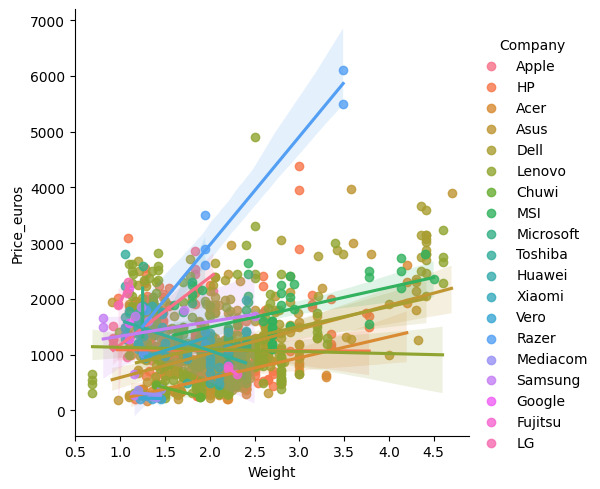

In [12]:
# 📊 Plotting a Linear Regression Model of Weight vs. Price with Company as Hue
sns.lmplot(x="Weight", y="Price_euros", hue="Company", data=df)


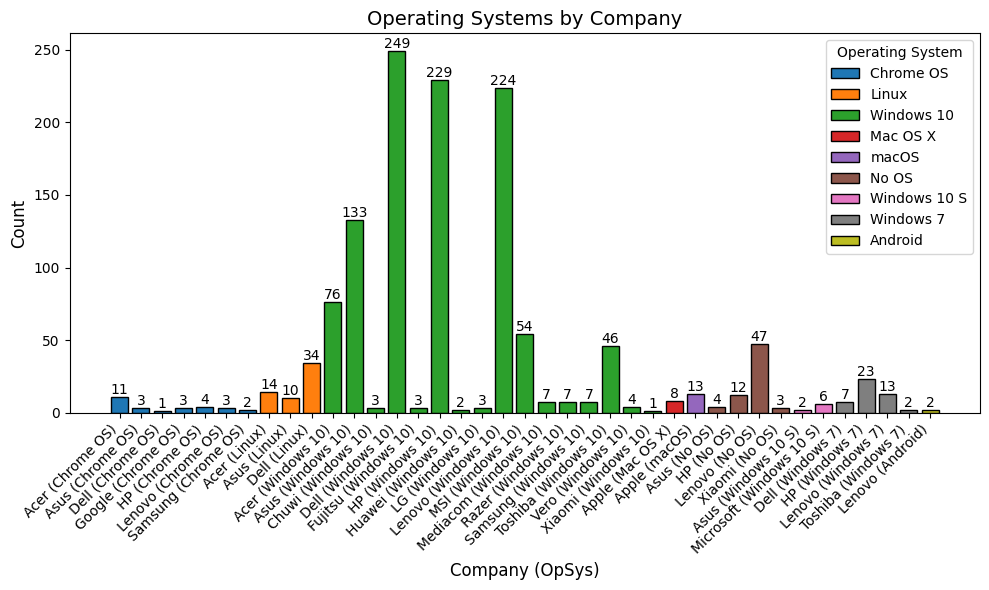

In [13]:
# Group data by Company and OpSys and count occurrences
company_opsys_data = df.groupby(["Company", "OpSys"]).size().reset_index(name="Count")

# Filter data where count is greater than 0
filtered_company_opsys_data = company_opsys_data[company_opsys_data["Count"] > 0]

# Plot the bar chart for Company vs. OpSys with edge borders and value labels
plt.figure(figsize=(10, 6))
bars = []  # Store bars for adding labels later

for opsys in filtered_company_opsys_data["OpSys"].unique():
    subset = filtered_company_opsys_data[filtered_company_opsys_data["OpSys"] == opsys]
    bar = plt.bar(
        subset["Company"] + " (" + subset["OpSys"] + ")",
        subset["Count"],
        label=opsys,
        edgecolor="black",  # Add edge border
    )
    bars.extend(bar)

# Add value labels to each bar
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

# Chart labels and legend
plt.xlabel("Company (OpSys)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Operating Systems by Company", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Operating System")
plt.tight_layout()

plt.show()


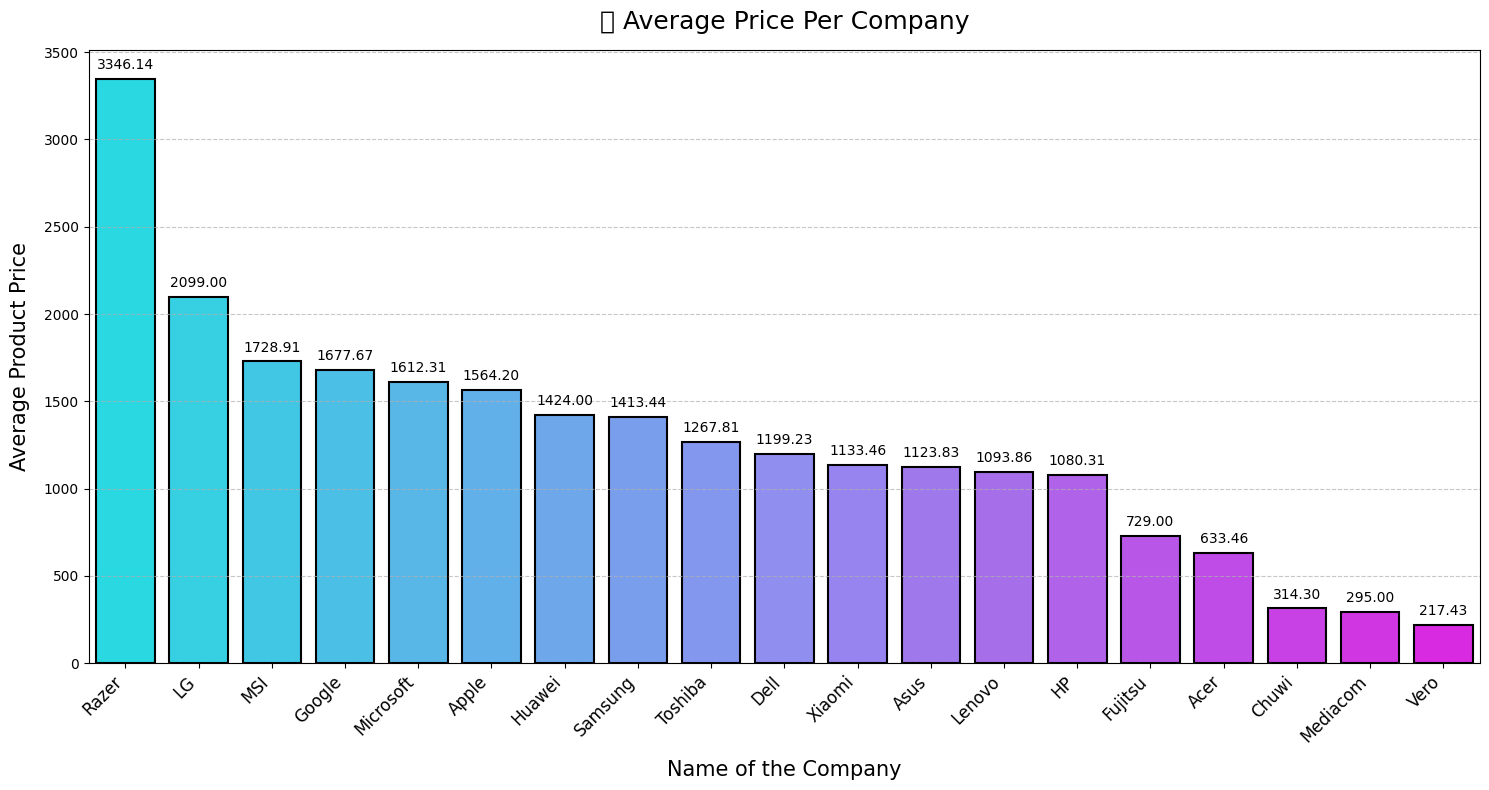

In [14]:
# 📊 Grouping and Calculating Average Product Price by Company
df_product_price = df.groupby("Company")["Price_euros"].mean()

# 🔄 Converting Series to DataFrame and Sorting
df_product_price = pd.DataFrame(data=df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price", ascending=False, inplace=True)

# 🎨 Plotting Bar Chart with Customization
plt.figure(figsize=(15, 8))
splot = sns.barplot(
    data=df_product_price,
    x=df_product_price.index,
    y="Product Avg Price",
    palette="cool",  # Changed palette for better visuals
    edgecolor="black",  # Beautifying edges
    linewidth=1.5,
)

# 🔢 Adding Value Annotations on Bars
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),  # Adjusted text position for better clarity
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

# 🏷️ Adding Labels and Title
plt.xlabel("Name of the Company", size=15, labelpad=10)
plt.ylabel("Average Product Price", size=15, labelpad=10)
plt.title("💻 Average Price Per Company", size=18, pad=15)
plt.xticks(size=12, rotation=45, ha="right")  # Adjusted for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Added a light grid for clarity
plt.tight_layout()

plt.show()


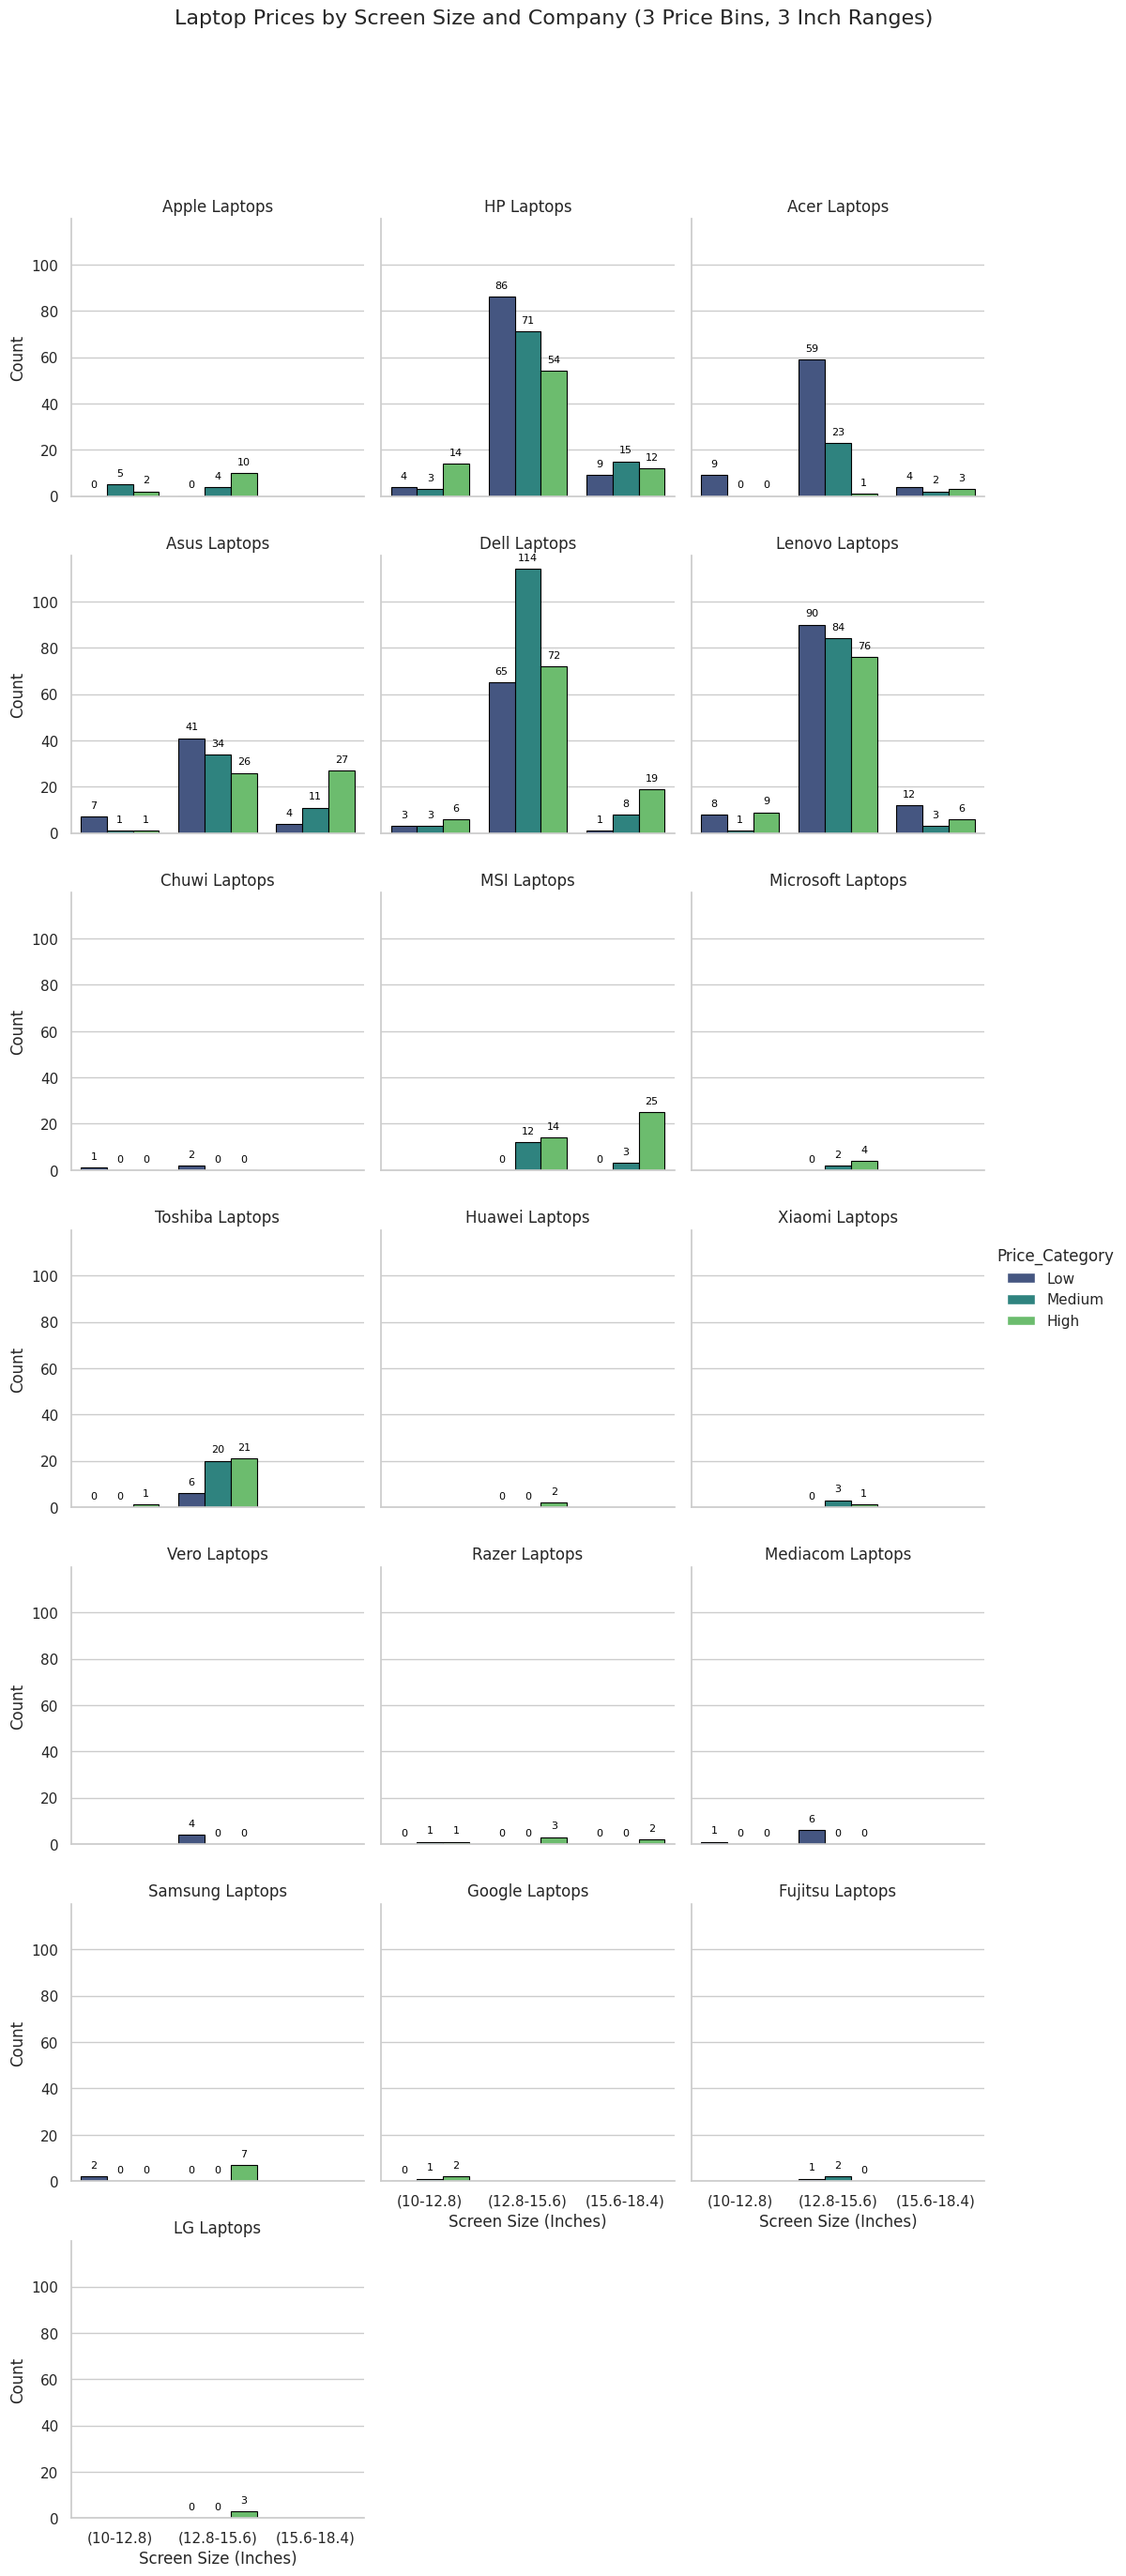

In [15]:
# 🏷️ Bin the prices into 3 categories and the Inches into 3 bins with ranges
df1 = df.copy()

# Remove rows with NaN values in any column
df1 = df1.dropna()

# Bin 'Price_euros' into 3 categories
df1["Price_Category"] = pd.qcut(df1["Price_euros"], 3, labels=["Low", "Medium", "High"])

# Bin 'Inches' into 3 categories and assign custom labels
df1["Inches_Category"] = pd.cut(
    df1["Inches"], 
    bins=3, 
    labels=["(10-12.8)", "(12.8-15.6)", "(15.6-18.4)"]  # Corrected labels
)

# 📊 Create a FacetGrid with bar plots and value count labels
sns.set(style="whitegrid")
g = sns.catplot(
    data=df1,
    x="Inches_Category",  # Use binned 'Inches' categories with ranges
    hue="Price_Category",
    col="Company",
    kind="count",  # Use count plot to show value counts
    height=4,
    aspect=0.9,
    palette="viridis",
    col_wrap=3,  # Set 3 plots per row
)

# Add value count labels to each bar, handling NaN heights
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Only annotate bars with non-NaN heights
            ax.annotate(
                f"{int(height)}",  # Display the height as a label
                (bar.get_x() + bar.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=8,
                color="black",
                xytext=(0, 5),
                textcoords="offset points",
            )
    # Add individual x-label for each subplot
    ax.set_xlabel("Inches (Categories)")

    # Customize bar edges with borders
    for bar in ax.patches:
        bar.set_edgecolor("black")
        bar.set_linewidth(0.8)

# 📌 Add overall labels and adjust layout
g.set_axis_labels("Screen Size (Inches)", "Count")
g.set_titles("{col_name} Laptops")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Laptop Prices by Screen Size and Company (3 Price Bins, 3 Inch Ranges)", fontsize=16)

plt.show()


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>


In [16]:
le=LabelEncoder()

from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [17]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60


<h3>🐺Features and Targets</h3>

<h3> 💦 LabelEncoding for Categorical Values</h3>

In [18]:
le=LabelEncoder()

from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

<h3> 👿 Correlation Heatmap</h3>

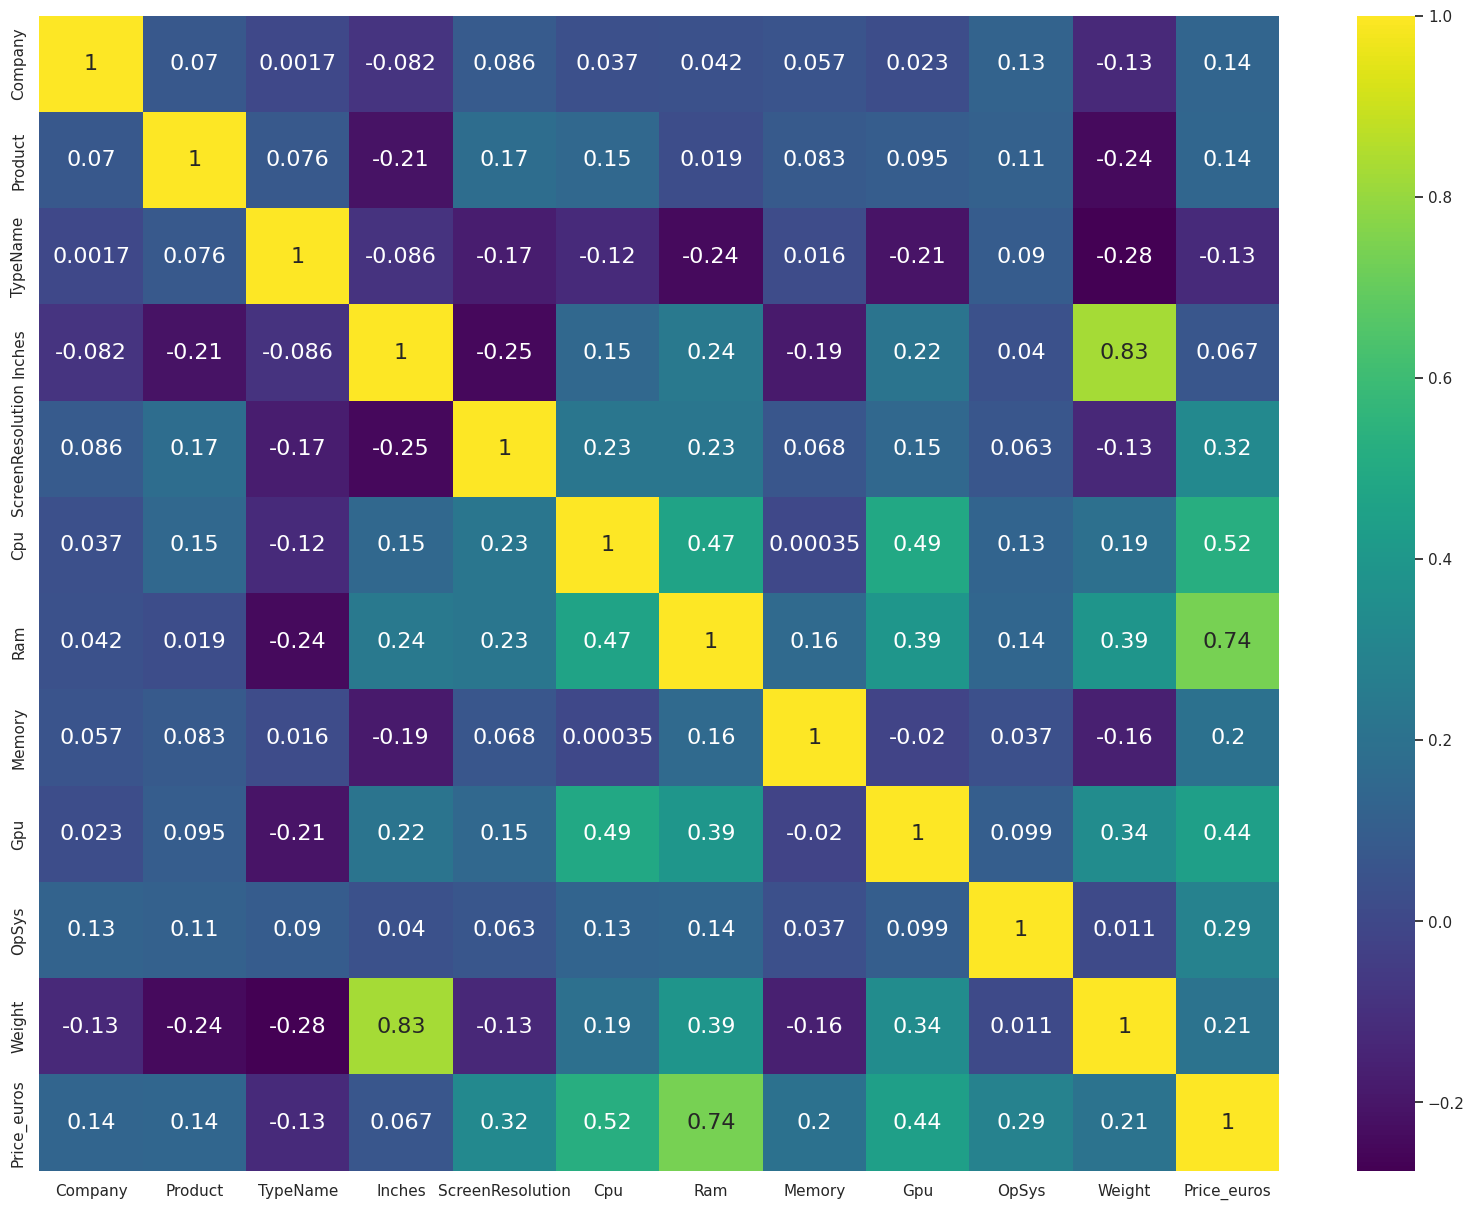

In [36]:
#correlation map
sns.heatmap(df.corr(), cmap="viridis", annot=True, annot_kws={"size":16})
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 1)

<h3> 💧 Separate target and features </h3>

In [20]:
#Target
y=df['Price_euros']
#Features
X=df.copy()
X=df.drop('Price_euros', axis=1)
print('shape of features X{}'.format(X.shape))
print('shape of target y{}'.format(y.shape))

shape of features X(1275, 11)
shape of target y(1275,)


<h3> 🐼 Features Scaling</h3>

In [21]:
#Standard Scaler
x= X.columns
sc= StandardScaler()
X[x] = sc.fit_transform(X[x])
X.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,-1.333546,-0.042870,1.136135,-1.205746,1.737738,-0.495277,-0.086499,-1.549159,0.142843,3.081382,-1.002380
1,-1.333546,-0.037025,1.136135,-1.205746,-1.056229,-0.575388,-0.086499,-1.801288,-0.180319,3.081382,-1.047227
2,0.131784,-1.504040,0.334490,0.403873,-0.167240,-0.134776,-0.086499,-0.036386,-0.087987,-0.787414,-0.269871
3,-1.333546,-0.042870,1.136135,0.263906,1.991735,0.305837,1.483418,1.602452,-2.119287,3.081382,-0.314718
4,-1.333546,-0.042870,1.136135,-1.205746,1.737738,-0.415165,-0.086499,-0.036386,0.189009,3.081382,-1.002380


<h3>🌚 Splitting Train and Test</h3>

In [22]:
# Perform stratified train-test split based on 'y' to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Print the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1020, 11)
Shape of X_test: (255, 11)
Shape of y_train: (1020,)
Shape of y_test: (255,)


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Define Model Function and Build Model</p>


<h3> 📌 Linear Regression </h3>

In [23]:
# Initialize the model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Coefficient (slope) of the model
m = lr.coef_
print('Coefficient/slope (m):', m)

# Intercept (c) of the model
c = lr.intercept_
print('Intercept (c):', c)

# Train accuracy (R² score for training data)
train_accuracy = lr.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = lr.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Coefficient/slope (m): [  44.25994003   25.59311594   56.02437058 -102.56659072   81.08094427
  114.93859979  387.92688259   54.49025552   83.17058239  109.07474782
   74.66627211]
Intercept (c): 1140.2754734095251
Train accuracy: 0.6701154081767677
Test accuracy: 0.6677019827718135
Mean Squared Error (Train): 161222.18013483335
Mean Squared Error (Test): 164932.55687873793
Mean Absolute Error (Train): 295.32725250144273
Mean Absolute Error (Test): 287.117189705209
R² Score (Train): 0.6701154081767677
R² Score (Test): 0.6677019827718135



<h3> 📌 Ridge </h3>

In [24]:
# Initialize the Ridge regression model
rd = Ridge(random_state=42, solver='lsqr')

# Fit the model on the training data
rd.fit(X_train, y_train)

# Coefficient (slope) of the model
m = rd.coef_
print('Coefficient/slope (m):', m)

# Intercept (c) of the model
c = rd.intercept_
print('Intercept (c):', c)

# Train accuracy (R² score for training data)
train_accuracy = rd.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = rd.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Coefficient/slope (m): [  44.20831299   25.62874684   55.84979588 -101.99203006   81.15631868
  114.95227574  387.48508504   54.55965311   83.24099849  109.00138934
   74.23336305]
Intercept (c): 1140.2687455508046
Train accuracy: 0.6701148745570522
Test accuracy: 0.6675837389447835
Mean Squared Error (Train): 161222.44092704987
Mean Squared Error (Test): 164991.24593409206
Mean Absolute Error (Train): 295.319461546903
Mean Absolute Error (Test): 287.1663532470138
R² Score (Train): 0.6701148745570522
R² Score (Test): 0.6675837389447835


<h3> 📌 Lasso </h3>

In [25]:
# Initialize the Lasso regression model
ls = Lasso()

# Fit the model on the training data
ls.fit(X_train, y_train)

# Coefficient (slope) of the model
m = ls.coef_
print('Coefficient/slope (m):', m)

# Intercept (c) of the model
c = ls.intercept_
print('Intercept (c):', c)

# Train accuracy (R² score for training data)
train_accuracy = ls.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = ls.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Coefficient/slope (m): [ 43.03251444  24.77564534  53.51538988 -95.67656999  80.64095222
 114.28196105 388.37580892  53.66769389  83.32888551 108.4809679
  66.58629599]
Intercept (c): 1140.2631967948973
Train accuracy: 0.6700712731307983
Test accuracy: 0.6671601660714197
Mean Squared Error (Train): 161243.74994593672
Mean Squared Error (Test): 165201.48178687
Mean Absolute Error (Train): 295.0531179852804
Mean Absolute Error (Test): 287.5313776441171
R² Score (Train): 0.6700712731307983
R² Score (Test): 0.6671601660714197


<h3> 📌 ElasticNet </h3>

In [26]:
# Initialize the ElasticNet regression model
en = ElasticNet()

# Fit the model on the training data
en.fit(X_train, y_train)

# Coefficient (slope) of the model
m = en.coef_
print('Coefficient/slope (m):', m)

# Intercept (c) of the model
c = en.intercept_
print('Intercept (c):', c)

# Train accuracy (R² score for training data)
train_accuracy = en.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = en.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Coefficient/slope (m): [ 35.67821078  29.47422364  14.55537704 -26.05009489  80.78710196
 113.88576935 252.72602582  57.65481774  85.55289009  87.40356982
  31.07967686]
Intercept (c): 1137.497828468193
Train accuracy: 0.6289028367839232
Test accuracy: 0.6046885709097292
Mean Squared Error (Train): 181363.71075981393
Mean Squared Error (Test): 196208.5880231844
Mean Absolute Error (Train): 312.8314384289237
Mean Absolute Error (Test): 315.73301303870517
R² Score (Train): 0.6289028367839232
R² Score (Test): 0.6046885709097292



<h3> 📌 DecisionTreeRegressor </h3>

In [27]:
# Initialize the DecisionTreeRegressor model
dtc = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dtc.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = dtc.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = dtc.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.9996512079646255
Test accuracy: 0.7560042761610356
Mean Squared Error (Train): 170.46268225490195
Mean Squared Error (Test): 121104.66061735294
Mean Absolute Error (Train): 1.6711372549019607
Mean Absolute Error (Test): 225.21558823529412
R² Score (Train): 0.9996512079646255
R² Score (Test): 0.7560042761610356


<h3> 📌 RandomForestRegressor </h3>



In [28]:
# Initialize the RandomForestRegressor model with the specified parameters
rf = RandomForestRegressor(random_state=42, max_features='sqrt')

# Fit the model on the training data
rf.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = rf.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = rf.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.9771456387167403
Test accuracy: 0.8703799384985785
Mean Squared Error (Train): 11169.451508213047
Mean Squared Error (Test): 64335.52732133278
Mean Absolute Error (Train): 64.07644909220357
Mean Absolute Error (Test): 166.29974612231558
R² Score (Train): 0.9771456387167403
R² Score (Test): 0.8703799384985785


<h3> 📌 ExtraTreesRegressor </h3>

In [29]:
# Initialize the ExtraTreesRegressor model
etr = ExtraTreesRegressor(random_state=42)

# Fit the model on the training data
etr.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = etr.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = etr.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.9996512079646255
Test accuracy: 0.8828542484447874
Mean Squared Error (Train): 170.46268225490195
Mean Squared Error (Test): 58144.03736936812
Mean Absolute Error (Train): 1.671137254902186
Mean Absolute Error (Test): 159.50488647058822
R² Score (Train): 0.9996512079646255
R² Score (Test): 0.8828542484447874


<h3> 📌 K-Nearest Neighboring Regressor </h3>

In [30]:
# Initialize the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = knn.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = knn.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.9996512079646255
Test accuracy: 0.7809184980883545
Mean Squared Error (Train): 170.46268225490195
Mean Squared Error (Test): 108738.75377447437
Mean Absolute Error (Train): 1.6711372549019607
Mean Absolute Error (Test): 206.82546487952857
R² Score (Train): 0.9996512079646255
R² Score (Test): 0.7809184980883545


<h3> 📌 Support Vector Regressor </h3>

In [31]:
# Initialize the SVR model with a linear kernel and C=9
svr = SVR(kernel='linear', C=9)

# Fit the model on the training data
svr.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = svr.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = svr.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.6517022959809752
Test accuracy: 0.6504815680022854
Mean Squared Error (Train): 170221.0911626745
Mean Squared Error (Test): 173479.72505669398
Mean Absolute Error (Train): 288.94561371911175
Mean Absolute Error (Test): 285.0474034895814
R² Score (Train): 0.6517022959809752
R² Score (Test): 0.6504815680022854


<h3> 📌 Linear Support Vector Regressor </h3>

In [32]:
# Initialize the LinearSVR model with specified parameters
lsvr = LinearSVR(random_state=42, loss='squared_epsilon_insensitive', C=9)

# Fit the model on the training data
lsvr.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = lsvr.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = lsvr.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = lsvr.predict(X_train)
y_test_pred = lsvr.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.6690944322783584
Test accuracy: 0.6700006757746415
Mean Squared Error (Train): 161721.15451644035
Mean Squared Error (Test): 163791.62526079407
Mean Absolute Error (Train): 294.34292628315285
Mean Absolute Error (Test): 286.2635844276515
R² Score (Train): 0.6690944322783584
R² Score (Test): 0.6700006757746415


<h3> 📌 Stochastic Gradient Descent Regressor </h3>

In [33]:
# Initialize the SGDRegressor model with specified parameters
sgd = SGDRegressor(random_state=42, loss='squared_epsilon_insensitive', max_iter=1000, n_iter_no_change=500)

# Fit the model on the training data
sgd.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = sgd.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = sgd.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

# Make predictions on the train and test data
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy: 0.670001743624479
Test accuracy: 0.6684426827418479
Mean Squared Error (Train): 161277.73061332875
Mean Squared Error (Test): 164564.91839278844
Mean Absolute Error (Train): 295.6041725893472
Mean Absolute Error (Test): 287.5159244543258
R² Score (Train): 0.670001743624479
R² Score (Test): 0.6684426827418479


<h3> 📌 GaussianProcessRegressor </h3>

In [34]:
# Initialize the GaussianProcessRegressor model without specifying the 'optimizer' incorrectly
gpr = GaussianProcessRegressor(random_state=42, optimizer='fmin_l_bfgs_b')  # or simply omit optimizer

# Fit the model on the training data
gpr.fit(X_train, y_train)

# Train accuracy (R² score for training data)
train_accuracy = gpr.score(X_train, y_train)
print('Train accuracy (R² score):', train_accuracy)

# Test accuracy (R² score for test data)
test_accuracy = gpr.score(X_test, y_test)
print('Test accuracy (R² score):', test_accuracy)

# Make predictions on the train and test data
y_train_pred = gpr.predict(X_train)
y_test_pred = gpr.predict(X_test)

# Mean Squared Error (MSE) for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)

# Mean Absolute Error (MAE) for train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Train):', mae_train)
print('Mean Absolute Error (Test):', mae_test)

# R² Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R² Score (Train):', r2_train)
print('R² Score (Test):', r2_test)


Train accuracy (R² score): 0.9996512079630365
Test accuracy (R² score): -28.46319487661223
Mean Squared Error (Train): 170.46268303141895
Mean Squared Error (Test): 14623740.777481819
Mean Absolute Error (Train): 1.6712359816641045
Mean Absolute Error (Test): 953.442664218662
R² Score (Train): 0.9996512079630365
R² Score (Test): -28.46319487661223


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Regression Model Comparison</p>


In [35]:
# Model names list
names = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTree', 'RandomForest', 
         'ExtraTree', 'KNN', 'SVR', 'LinearSVR', 'SGDRegressor', 'GaussianProcess']

# Initialize models list (list of model instances)
models = [
    LinearRegression(),  # Linear Regression
    Ridge(random_state=42, solver='lsqr'),  # Ridge Regression
    Lasso(),  # Lasso Regression
    ElasticNet(),  # ElasticNet Regression
    DecisionTreeRegressor(random_state=42),  # Decision Tree Regressor
    RandomForestRegressor(random_state=42, max_features='sqrt'),  # Random Forest Regressor
    ExtraTreesRegressor(random_state=42),  # Extra Trees Regressor
    KNeighborsRegressor(n_neighbors=3, weights='distance'),  # KNN Regressor
    SVR(kernel='linear', C=9),  # Support Vector Regressor (SVR)
    LinearSVR(random_state=42, loss='squared_epsilon_insensitive', C=9),  # LinearSVR
    SGDRegressor(random_state=42, loss='squared_epsilon_insensitive', n_iter_no_change=500),  # SGD Regressor
    GaussianProcessRegressor(random_state=42, optimizer='fmin_l_bfgs_b'),  # Gaussian Process Regressor
]

# Prepare empty DataFrame to store results
models_compare = pd.DataFrame(columns=['Model Name', 'Train Accuracy(Percentage)', 'Test Accuracy(Percentage)', 
                                       'Train R2 Score(Percentage)', 'Test R2 Score(Percentage)', 
                                       'Mean Squared Error', 'Root Mean Squared Error', 
                                       'Mean Absolute Error'])

row_index = 0

# Loop over models and evaluate them
for models_name, ml in zip(names, models): 
    
    # Fit the model on training data
    ml.fit(X_train, y_train)
    
    # Predict on test data
    y_test_pred = ml.predict(X_test)
    y_train_pred = ml.predict(X_train)
    
    # Calculate metrics
    # Calculate metrics and convert accuracy to percentage
    models_compare.loc[row_index, 'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy(Percentage)'] = round(ml.score(X_train, y_train) * 100, 2)  # Convert to percentage
    models_compare.loc[row_index, 'Test Accuracy(Percentage)'] = round(ml.score(X_test, y_test) * 100, 2)  # Convert to percentage
    
    # Calculate R² Score for both train and test and convert to percentage
    models_compare.loc[row_index, 'Train R2 Score(Percentage)'] = round(r2_score(y_train, y_train_pred) * 100, 2)  # Convert to percentage
    models_compare.loc[row_index, 'Test R2 Score(Percentage)'] = round(r2_score(y_test, y_test_pred) * 100, 2)  # Convert to percentage
    
    # Calculate Mean Squared Error
    models_compare.loc[row_index, 'Mean Squared Error'] = round(mean_squared_error(y_test, y_test_pred), 5)
    
    # Calculate Root Mean Squared Error
    models_compare.loc[row_index, 'Root Mean Squared Error'] = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 5)
    
    # Calculate Mean Absolute Error
    models_compare.loc[row_index, 'Mean Absolute Error'] = round(mean_absolute_error(y_test, y_test_pred), 5)
    
    # Increment row index for next model
    row_index += 1

# Sort models by Test Accuracy in descending order
models_compare.sort_values(by='Test Accuracy(Percentage)', ascending=False, inplace=True)

# Display the results
models_compare


,Model Name,Train Accuracy(Percentage),Test Accuracy(Percentage),Train R2 Score(Percentage),Test R2 Score(Percentage),Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
6,ExtraTree,99.97,88.29,99.97,88.29,58144.03737,241.13075,159.50489
5,RandomForest,97.71,87.04,97.71,87.04,64335.52732,253.64449,166.29975
7,KNN,99.97,78.09,99.97,78.09,108738.75377,329.7556,206.82546
4,DecisionTree,99.97,75.6,99.97,75.6,121104.66062,348.00095,225.21559
9,LinearSVR,66.91,67.0,66.91,67.0,163791.62526,404.71178,286.26358
10,SGDRegressor,67.0,66.84,67.0,66.84,164564.91839,405.66602,287.51592
0,Linear Regression,67.01,66.77,67.01,66.77,164932.55688,406.1189,287.11719
1,Ridge,67.01,66.76,67.01,66.76,164991.24593,406.19114,287.16635
2,Lasso,67.01,66.72,67.01,66.72,165201.48179,406.44985,287.53138
8,SVR,65.17,65.05,65.17,65.05,173479.72506,416.50897,285.0474


# <p style="background-color:#137e9b;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Summary</p>


The ExtraTree model leads with **99.97%** Train Accuracy and **88.29%** Test Accuracy, paired with a low **Mean Absolute Error (MAE) of 159.50.** RandomForest also performs strongly with 97.71% Train Accuracy and 87.04% Test Accuracy, showing an MAE of 166.30. On the lower end, ElasticNet (60.47% Test Accuracy) and GaussianProcess (-2846.32 Test Accuracy) exhibit poor test performance, with GaussianProcess suffering from severe overfitting. Models like LinearSVR, SGDRegressor, and Lasso show moderate performance, with Test Accuracies around 66%-67% and MAEs ranging from 285.05 to 287.53. Overall, the tree-based models (ExtraTree, RandomForest, DecisionTree) are the top performers for this dataset.